# Project Description
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.  
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

The datasets have been exported from online databases and the weather data has been scraped from online weather protals for the same time.


**Description of datasets:**  

Rides_by_com  
- mpany_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.  

rides_by_district
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

loop_airport  
It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
start_ts  
- pickup date and time
- weather_conditions
- weather conditions at the moment the ride started
- duration_seconds
- ride duration in seconds

# TOC

- [Project Description](#Project-Description)
- [TOC](#TOC)
- [1. Data Inspection](#1.-Data-Inspection)
    * [1.1. Rides_by_comp](#1.1.-Rides_by_comp)
    * [1.2. Rides_by_dist](#1.2.-Rides_by_dist)
    * [1.3. Loop Airport](#1.3.-Loop-Airport)
- [2. Data Preoprocessing](#2.-Data-Preoprocessing)
    * [2.1. Changing datatypes](#2.1.-Changing-datatypes)
    * [2.2. Additional features](#2.2.-Additional-features)
- [3. EDA](#3.-EDA)
    * [3.1. Rides by cab company](#3.1.-Rides-by-cab-company)
        + [3.1.1. Investigating outliers](#3.1.1.-Investigating-outliers)
        + [3.1.2. Searching and checking additional data](#3.1.2.-Searching-and-checking-additional-data)
        + [3.1.3. Additional data: Dropping uneccessary cols](#3.1.3.-Additional-data:-Dropping-uneccessary-cols)
        + [3.1.4. Additional Data: Preprocessing](#3.1.4.-Additional-Data:-Preprocessing)
        + [3.1.5. rides_by_company: Extracting further features](#3.1.5.-rides_by_company:-Extracting-further-features)
        + [3.1.6. Merging data and looking for patterns](#3.1.6.-Merging-data-and-looking-for-patterns)
        + [3.1.7. Categorizing company types](#3.1.7.-Categorizing-company-types)
        + [3.1.8. EDA after company type](#3.1.8.-EDA-after-company-type)
    * [3.2. Rides by district](#3.2.-Rides-by-district)
        + [3.2.1. General overview](#3.2.1.-General-overview)
        + [3.2.2. Slicing dataframe and plotting top ten districts](#3.2.2.-Slicing-dataframe-and-plotting-top-ten-districts)
        + [3.2.3. Investigating causes for distributions](#3.2.3.-Investigating-causes-for-distributions)
    * [3.3. Loop airport](#3.3.-Loop-airport)
        + [3.3.1. Missing data](#3.3.1.-Missing-data)
        + [3.3.2. Invalid data and outliers](#3.3.2.-Invalid-data-and-outliers)
        + [3.3.3. General vizualisation](#3.3.3.-General-vizualisation)
        + [3.3.4. Vizalisation after weather](#3.3.4.-Vizalisation-after-weather)
- [4. SDA with loop Airport data](#4.-SDA-with-loop-Airport-data)
    * [4.1. By hourly weather](#4.1.-By-hourly-weather)
    * [4.2. By daily weather](#4.2.-By-daily-weather)
- [5. Overall conclusion](#5.-Overall-conclusion)

In [1]:
import re
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from random import choices as rd_choices
from scipy import stats as st
%matplotlib inline

try:
    rides_by_comp = pd.read_csv('rides_by_comp.csv')
    rides_by_dist = pd.read_csv('rides_by_dist.csv')
    loop_airport = pd.read_csv('airport_loop.csv')

except:
    rides_by_comp = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_01.csv')
    rides_by_dist = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_04.csv')
    loop_airport = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_07.csv')

# 1. Data Inspection
> In this first step the data has been ispected to get a general overview

## 1.1. Rides_by_comp

In [2]:
display(rides_by_comp.head(5))
display(rides_by_comp.info())
display(rides_by_comp.describe())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


> **Observations:**
> - There are 64 different companies with the relating trips in the dataframe
> - There are no missing values and the datatypes are correct
> - There are definetely outliers in the trips amounts colum due to the characteristical values
> - In case that needed, cathegorizing companies

## 1.2. Rides_by_dist

In [3]:
display(rides_by_dist.head(5))
display(rides_by_dist.info())
display(rides_by_dist.describe())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


> **Observations:**
> - There are 94 different dropoff district locations with relating average trips oper month in the dataframe
> - There are no missing values
> - The average_trips should be converted to int
> - There are definetely outliers in the average_trips colum due to the characteristical values
> - In case that needed, cathegorizing dropof locations

## 1.3. Loop Airport

In [4]:
display(loop_airport.head(5))
display(loop_airport.info())
display(loop_airport.describe())
zero_duration = (loop_airport.duration_seconds== 0.0).sum()
print(f'There are {zero_duration} zeros in the duration seconds column')

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


There are 6 zeros in the duration seconds column


> **Observations:**
> - There are 1068 trips from the loop to the airport
> - There are no missing values
> - start_ts must be casted as datetime 
> - weather_conditions must be cathegorized (boolean value for good/bad)
> - duration_seconds must be casted as int
> - duration_seconds contains 6 missing/wrong values because the duration 0 must be treated as missing value in this context. Those circumstances will be determinated within the EDA
> - There are definetely outliers in the average_trips colum due to the characteristical values

# 2. Data Preoprocessing

## 2.1. Changing datatypes
> In this step the datatypes of the previous identified dataframes and columns have been changed:

> **Rides_by_dist:**
> - average_trips to int

> **Loop_aiport:**
> - Start_ts must be casted as datetime
> - Weather_conditions must be cathegorized (boolean value for good/bad)
> - Duration_seconds must be casted as int

In [5]:
# Converting the collumns to the target datatypes for rides_by_dist
rides_by_dist['average_trips'] = rides_by_dist['average_trips'].astype(int)

# Converting the collumns to the target datatypes for loop_airport
# Casting float to int 
loop_airport['duration_seconds'] = loop_airport['duration_seconds'].astype(int)
# Casting string as datetime
loop_airport['start_ts'] = pd.to_datetime(
    loop_airport['start_ts'],
    format='%Y-%m-%d %H:%M:%S'
)

# Replacing weather by boolean value
weather = {'Good': 1, 'Bad': 0}
loop_airport['weather_conditions'].replace(weather, inplace=True)

## 2.2. Additional features
> - To ease further analysis a collumn with the minutes will be added
> - To investigate the trips over hours, the hours of the datetime collumn will be extracted and stored in an additonal collumn

In [6]:
# Adding minutes column
loop_airport['duration_min'] = loop_airport['duration_seconds'] / 60

# Adding hour collumn
loop_airport['hour'] = loop_airport['start_ts'].dt.hour
loop_airport

,start_ts,weather_conditions,duration_seconds,duration_min,hour
0,2017-11-25 16:00:00,1,2410,40.166667,16
1,2017-11-25 14:00:00,1,1920,32.000000,14
2,2017-11-25 12:00:00,1,1543,25.716667,12
3,2017-11-04 10:00:00,1,2512,41.866667,10
4,2017-11-11 07:00:00,1,1440,24.000000,7
...,...,...,...,...,...
1063,2017-11-25 11:00:00,1,0,0.000000,11
1064,2017-11-11 10:00:00,1,1318,21.966667,10
1065,2017-11-11 13:00:00,1,2100,35.000000,13
1066,2017-11-11 08:00:00,1,1380,23.000000,8


> **Conclusion:**  
> Within the preprocessing, the datatypes have been adjusted and additional features have been calculated

# 3. EDA 
> In this step of the project the EDA of the multiple dataframes haas been carried out.

## 3.1. Rides by cab company
> In the first step the EDA has been carried out for investigating the rides according to company.  
> This included  the following steps:
> - Investigating the outliers
> - researching further data
> - Preporcess additional data
> - Extracting of further features
> - Merging the additional data with the given data
> - Cathegorize company types
> - Draw conclusion

### 3.1.1. Investigating outliers

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Median: 178.5

Whiskers:
upper whisker5235.125
lower whisker:-3107.875


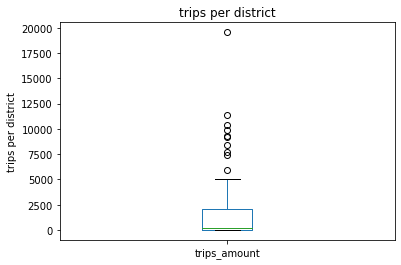

In [7]:
# General overview over dataset
display(rides_by_comp.describe())
trips_median = rides_by_comp['trips_amount'].median()
print(f'Median: {trips_median}')

# Boxplot for idenuitfying outliers
ax = rides_by_comp['trips_amount'].plot(kind='box');
ax.set_title('trips per district')
ax.set_ylabel('trips per district')

# Calculating upper and lower whiskers
iqr = rides_by_comp['trips_amount'].quantile(.75) - rides_by_comp['trips_amount'].quantile(.25)
low = rides_by_comp['trips_amount'].quantile(.25) - iqr*1.5
up = rides_by_comp['trips_amount'].quantile(.75) + iqr*1.5
print(f'\nWhiskers:\nupper whisker{up}\nlower whisker:{low}')

> **Observations:**
> - The Dataset shows high degree of distortion. Median 178 and mean of 2145  
> - \-\> Needs to be investigated further

In [8]:
# Displaying complete dataset ordered by trips
with pd.option_context("display.max_rows", None):
    display(rides_by_comp)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


> **Observations:**  
> - The dataset contains multiple Associations/Affiliations/Unations and also a lot of small companys only containing one to two cabs.  
> - This leads to massive differences in the trips per day.  
> - Thus further investigation has been made to identify small companys and cathegorize.  
> - In the further investigation small buissneses and large companys will be investigated separatly

### 3.1.2. Searching and checking additional data

> In order to understand the huge difference of rides and the shift in the dataset further information has been researched to check the previous assumption of affiliations vs independent drivers.

>**Taxi trips 2016-2021: (unused)**  
https://data.cityofchicago.org/Transportation/Taxi-Trips-2016/bk5j-9eu2

> **Medallion owners:**  
https://data.cityofchicago.org/Community-Economic-Development/Public-Passenger-Vehicle-Licenses-Taxis-Only/gcze-gasw/data#revert

> **Medallion Transfers: (unused in this project)**  
https://www.chicago.gov/content/dam/city/depts/bacp/publicvehicleinfo/medallionowners/medalliontransfers8222007tomay312019.pdf

In [9]:
# The API works with sodapy, so need to install that
!pip install sodapy

Defaulting to user installation because normal site-packages is not writeable


In [10]:
# reading in additional data
try:
    taxi_licences = pd.read_csv('Public_Passenger_Vehicle_Licenses_Taxis_Only.csv')
except:
    from sodapy import Socrata
    client = Socrata("data.cityofchicago.org", None)
    results = client.get("gcze-gasw", limit=10000)
    taxi_licences = pd.DataFrame.from_dict(results)
    
# Formating cllum names
taxi_licences.columns = taxi_licences.columns.str.lower().str.replace(' ', '_')

# Investigating unnecessary columns 
display(taxi_licences.nunique())
display(taxi_licences.head(2))
display(taxi_licences['city'].unique())

vehicle_type                            1
public_vehicle_number                6999
status                                  7
vehicle_fuel_source                     4
wheelchair_accessible                   2
company_name                         3820
address                               423
city                                    6
state                                   1
zip_code                               48
record_id                            6999
vehicle_make                           16
vehicle_model                          58
vehicle_model_year                     25
vehicle_color                          51
taxi_affiliation                       34
taxi_medallion_license_management      22
dtype: int64

,vehicle_type,public_vehicle_number,status,vehicle_fuel_source,wheelchair_accessible,company_name,address,city,state,zip_code,record_id,vehicle_make,vehicle_model,vehicle_model_year,vehicle_color,taxi_affiliation,taxi_medallion_license_management
0,Taxi,6986,INACTIVE,Gasoline,N,CITY OF CHICAGO BACP,2350 W. OGDEN AVE.,CHICAGO,IL,60608,6986Taxi,NaN,NaN,NaN,NaN,NaN,NaN
1,Taxi,6848,INACTIVE,Gasoline,N,CITY OF CHICAGO BACP,2350 W. OGDEN AVE.,CHICAGO,IL,60608,6848Taxi,NaN,NaN,NaN,NaN,NaN,NaN


array(['CHICAGO', 'METTAWA', 'SKOKIE', 'CHGO', 'CHCAGO', 'NILES'],
      dtype=object)

> **Observation:**
> - rows with other citys than chicago can be dropped (cause dataframe rides_by_com contains only chicago too)   
> - After dropping the unnecessary rows, this column can be dropped 
> - Vehicle type and state is not needed because they ony have one unique value
> - Every detail regarding the vehicle except the number is not needed
> - The adress inclucing city is not needed
> - The medallion management is not needed
> - \-\> all uneccessary values need to be dropped

### 3.1.3. Additional data: Dropping uneccessary cols
> In this step the uneccessary colums have been dropped as well as the columns have been renamed

In [11]:
# Dropping rows which contain other citys than chicago:
taxi_licences = taxi_licences.query("city.str.lower() == 'chicago'")

# Dropping unnecessary information and columns with only one value as well as record id cause record id = vehivle number
to_drop = ['vehicle_type', 'vehicle_make', 'vehicle_model', 'record_id',
           'vehicle_model_year', 'vehicle_color', 'vehicle_fuel_source',
           'wheelchair_accessible', 'address', 'state', 'city', 'zip_code',
           'taxi_medallion_license_management']
try:
    taxi_licences.drop(columns=to_drop, inplace=True)
except:
    to_drop = ['vehicle_type', 'vehicle_make', 'vehicle_model', 'record_id',
           'vehicle_model_year', 'vehicle_color', 'vehicle_fuel_source',
           'wheelchair_accessible', 'address', 'state', 'city', 'zip_code',
           'taxi_medallion_license_management_']
    taxi_licences.drop(columns=to_drop, inplace=True)
    
taxi_licences.columns = ['car_num', 'status', 'company_name', 'taxi_affiliation']
taxi_licences['car_num'] = taxi_licences['car_num'].astype(int)
taxi_licences

,car_num,status,company_name,taxi_affiliation
0,6986,INACTIVE,CITY OF CHICAGO BACP,NaN
1,6848,INACTIVE,CITY OF CHICAGO BACP,NaN
2,6982,INACTIVE,CITY OF CHICAGO BACP,NaN
3,5644,VIOLATION,"LINCOLNSHIRE SERVICE II, CORP.",NOVA TAXI
4,1093,SURRENDER,YC18 LLC,Yellow Cab Association
...,...,...,...,...
6994,6775,REVOKED,RULE CAB CORP,Ace Cab Association Inc
6995,6897,REVOKED,SHAZIF CAB CORP.,DIS-AFFILIATED
6996,2593,VIOLATION,A & Z CAB CO II,Yellow Cab Association
6997,2283,SURRENDER,EMIKISSA'S INC,Choice Taxi Association Inc


> **Observations:**  
> - the names, city, status, taxi_affiliation and medallion management need to be converted to lower case.
> - the taxi_affiliation contains NaN values as well as multiple versions for intependend which need to be merged
> - to match the companies, medallion management/affiliation, the car numbers, zip codes and names needs to be be extracted from the rides_by_comp dataframe:

### 3.1.4. Additional Data: Preprocessing
> In this step the text in the collumns has been converted to lower case as well as the taxi_affiliations has been worked on 

In [12]:
# Filling nan values with representative string
taxi_licences['taxi_affiliation'].fillna('no_affiliation', inplace=True)

# Merging all independent categories to one
def merge_independend(afi):
    '''Merge all the independends to one'''
    if ('independent' in afi.lower()) or (afi.lower()=='no_affiliation'):
        return 'independent'
    return afi

taxi_licences['taxi_affiliation'] = taxi_licences['taxi_affiliation'].apply(merge_independend)

# Converting all text for matching to lower case
for col in ['status', 'company_name', 'taxi_affiliation']:
    taxi_licences[col] = taxi_licences[col].str.lower()

# Output all different associations for checking if something else needs to be merged
with pd.option_context("display.max_rows", None):
    display(taxi_licences['taxi_affiliation'].value_counts().sort_values())

service taxi association inc         3
metro jet                            7
chicago city taxi assoc             11
5 star taxi association inc         20
polo5c taxi cabcorp                 24
gold coast taxi assoc               24
wolley taxi                         32
koam taxi association               48
king drive cab affiliation inc      53
american-united cab assn            59
peace taxi assoc inc                69
ace cab association inc             71
nova taxi                           78
24 seven taxi affiliaton            96
blue diamond taxi affil inc        102
top cab association                157
chicago carriage cab               167
globe taxi association inc         203
checker taxi association co.       205
choice taxi association inc        207
dispatch taxi affil                216
blue ribbon assn inc               224
city service taxi association      280
northstar affiliation              296
royal 3 ccc chicago taxi assoc     330
sun taxi association inc 

### 3.1.5. rides_by_company: Extracting further features
> In this step the the information which is provided in the company name has been extracted and divided into additional columns. This is needed in order to be able to compare the rides_by_company dataframe with the columns of the aditional collected data and draw conclusions from that merged dataframe.    
This includes: 
> - car number. This 4 digit number is only provided in some of the company names.
> - the unknown id, it can be determined what kind of number this is.
> - the company name itself without further information 

In [13]:
# Defining functions to extract the car_nums, zip codes and names itself
def extract_car_num(name):
    pattern = r'\b[0-9]{4}\b'
    car_num = re.findall(pattern, name)
    if car_num: return int(car_num[0])
    return 0

def extract_company_name(name):
    pattern = r'\b[0-9]{0,3}[a-zA-Z \,&.]{2,}'
    company_name = re.findall(pattern, name)
    return company_name[0].lstrip().lower()
    
def extract_unknown_id(name):
    pattern = r'\b[0-9]{5}\b'
    zip_code = re.findall(pattern, name)
    if zip_code : return int(zip_code[0])
    return 0

rides_by_comp['car_num'] = rides_by_comp['company_name'].apply(extract_car_num)
rides_by_comp['unknown_id'] = rides_by_comp['company_name'].apply(extract_unknown_id)
rides_by_comp['company_name'] = rides_by_comp['company_name'].apply(extract_company_name)
rides_by_comp

,company_name,trips_amount,car_num,unknown_id
0,flash cab,19558,0,0
1,taxi affiliation services,11422,0,0
2,medallion leasing,10367,0,0
3,yellow cab,9888,0,0
4,taxi affiliation service yellow,9299,0,0
...,...,...,...,...
59,adwar h. nikola,7,4053,40193
60,benny jona,7,2733,74600
61,sergey cab corp.,5,5874,73628
62,felman corp,3,2241,44667


### 3.1.6. Merging data and looking for patterns
> In this step the dataframes have been merged on the car_num column because the names are still too different.

In [14]:
merged_car_nums = pd.merge(rides_by_comp, taxi_licences, how='left', on='car_num')
with pd.option_context("display.max_rows", None):
    display(merged_car_nums)

,company_name_x,trips_amount,car_num,unknown_id,status,company_name_y,taxi_affiliation
0,flash cab,19558,0,0,NaN,NaN,NaN
1,taxi affiliation services,11422,0,0,NaN,NaN,NaN
2,medallion leasing,10367,0,0,NaN,NaN,NaN
3,yellow cab,9888,0,0,NaN,NaN,NaN
4,taxi affiliation service yellow,9299,0,0,NaN,NaN,NaN
5,chicago carriage cab corp,9181,0,0,NaN,NaN,NaN
6,city service,8448,0,0,NaN,NaN,NaN
7,sun taxi,7701,0,0,NaN,NaN,NaN
8,star north management llc,7455,0,0,NaN,NaN,NaN
9,blue ribbon taxi association inc.,5953,0,0,NaN,NaN,NaN


> **Observations**
> - Merging by name in this state is not possible to differences in punctuation, and different shortings like corp, co, corp. ...
> - By merging the car numbers and comparing the company names, it turns out, that nearly all of the companies from the trips_by_company table which contain the car code and the unknown id are independant. There are a few exceptions but they could appear because the dataset from the chicago goverment website contains data from including 2020 and the data of the rides_per_company is from November 2017. It seems, that in the meantime a lot of driver surrendered and/or sold their taxi medallion or joined an affiliation, so that the cab number is assigned to a new company/affiliation now. 
> - \-\> Due to the time discrepancy of both datasets, all companies which contain the car number will be assumed to be independent, the resto of the companies will be categorized as affiliation.

> - A lot of the independent drivers surrendered.   

> **Outlook:**
> - Further string processing can be carried out where things like 'corp', 'co', punctuationa etc. can be filtered out/ignored to match the company names better with higher accuracity
> - Thed data of the PDF with the selling history could be extracted and the movements of ownership of medallions  could be tracked which is too much effort for this survey because there less than 5 cases. 
> - It could be investigated how the surrender rates are between affiliations and independend drivers

### 3.1.7. Categorizing company types
> In this step the companies have been categorized after independent and affiliations

In [15]:
# Creating dict to know which cathegoy has which index
company_type = {0: 'independant', 1: 'affiliation'}

# Categorizing
rides_by_comp['affiliation'] = rides_by_comp['car_num'].apply(lambda x: 1 if x == 0 else 0)
display(rides_by_comp.head(2))
display(rides_by_comp.tail(2))

,company_name,trips_amount,car_num,unknown_id,affiliation
0,flash cab,19558,0,0,1
1,taxi affiliation services,11422,0,0,1


,company_name,trips_amount,car_num,unknown_id,affiliation
62,felman corp,3,2241,44667,0
63,rc andrews cab,2,3556,36214,0


### 3.1.8. EDA after company type
> In this step the previous carried out EDA is redone but now for each type of company: independent and affiliation

,count,mean,std,min,25%,50%,75%,max
affiliation,,,,,,,,
0,27.0,19.481481,11.098754,2.0,12.5,16.0,29.0,39.0
1,37.0,3696.891892,4423.828977,11.0,402.0,1775.0,5953.0,19558.0


Whiskers for independant cabs
upper whisker: 53.75, lower whisker: -12.25

Whiskers for affiliation cabs
upper whisker: 14279.5, lower whisker: -7924.5



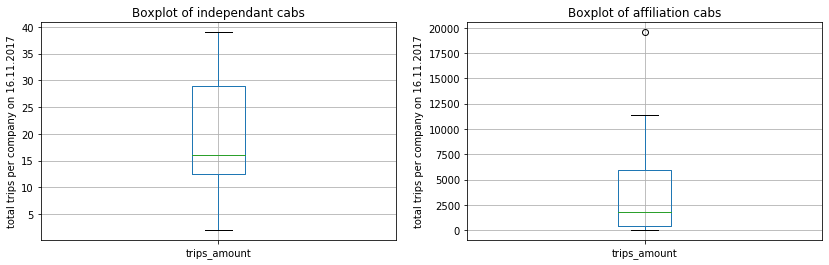

In [16]:
# Getting an overview about new dataframes
display(rides_by_comp.groupby('affiliation')['trips_amount'].describe())

# Identify outliers with boxplots
cols = ['trips_amount', 'company_name']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
for idx, (name, df) in enumerate(rides_by_comp.groupby('affiliation')[cols]):
    iqr = df['trips_amount'].quantile(.75) - df['trips_amount'].quantile(.25)
    low = df['trips_amount'].quantile(.25) - iqr*1.5
    up = df['trips_amount'].quantile(.75) + iqr*1.5
    print(f'Whiskers for {company_type[name]} cabs')
    print(f'upper whisker: {up}, lower whisker: {low}\n')
    df.boxplot(column='trips_amount', ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {company_type[name]} cabs')
    axes[idx].set_ylabel('total trips per company on 16.11.2017')
plt.show()

> **Observation:**
> - Now the derivation look much better, due to the fact, that there is only one outlier in the affiliation group.
> - The datasets are still shifted but way less then before the separation
> - The outlier is kept because only the top performing cab companies are searched

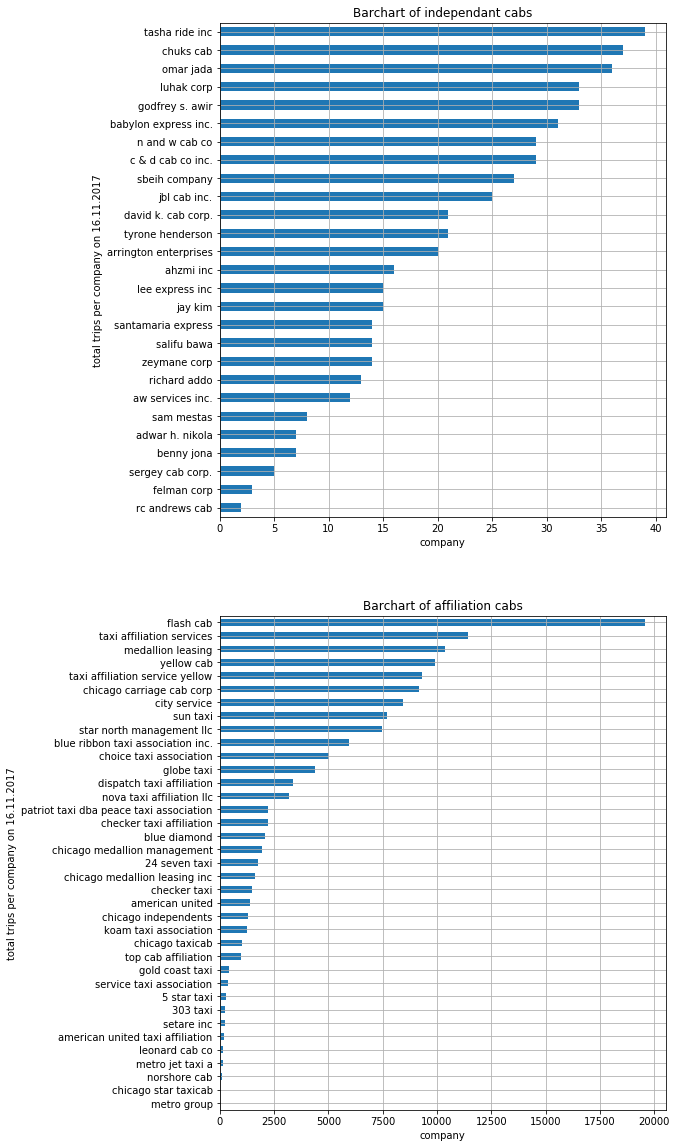

In [17]:
# Identify best performing companies
cols = ['trips_amount', 'company_name']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 20))
for idx, (name, df) in enumerate(rides_by_comp.groupby('affiliation')[cols]):
    df.sort_values('trips_amount') \
      .plot(kind='barh', 
            x='company_name', 
            y='trips_amount', 
            ax=axes[idx],
            grid=True,
           legend=False)
    axes[idx].set_title(f'Barchart of {company_type[name]} cabs')
    axes[idx].set_xlabel('company')
    axes[idx].set_ylabel('total trips per company on 16.11.2017')

> **Observation:**
> **Independend cabs:**
> - tasha ride inc, chunks cab, omar jaba are the best performing independend cabs
> - The rides for independend cabs decreases nearly linearly

> **Affiliation cabs:**
> - flash cabs is complete outperforming the concurency but most likely only because they got the most cabs in the affiliation
> - more than half of the affiliations got less then 2500 rides at that day whereas the top forth has more than 7500 rides

## 3.2. Rides by district

### 3.2.1. General overview
> In this step a general overview over the dataframe has been made.

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


upper whisker: 725.875
lower whisker: -413.125


Text(0, 0.5, 'Total rides by district')

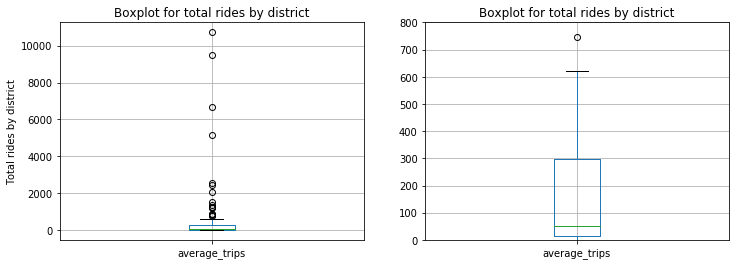

In [18]:
# Display general information:
display(rides_by_dist.describe())

# Showing data distribution and data shift 
iqr = rides_by_dist['average_trips'].quantile(.75) - rides_by_dist['average_trips'].quantile(.25)
low = rides_by_dist['average_trips'].quantile(.25) - iqr*1.5
up = rides_by_dist['average_trips'].quantile(.75) + iqr*1.5
print(f'upper whisker: {up}\nlower whisker: {low}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
rides_by_dist.boxplot(ax=axes[0]);
rides_by_dist.boxplot(ax=axes[1]);
axes[1].set_ylim(0,800)
axes[0].set_title('Boxplot for total rides by district')
axes[1].set_title('Boxplot for total rides by district')
axes[0].set_ylabel('Total rides by district')

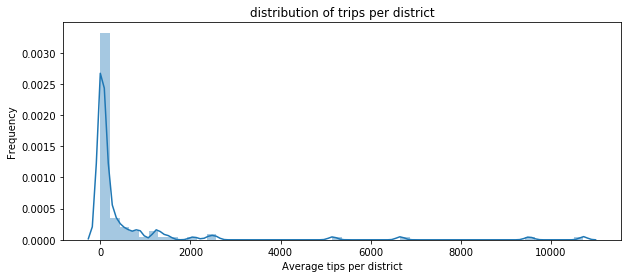

In [19]:
# Plotting the distibution of rides
fig = plt.figure(figsize=(10,4))
ax = sns.distplot(rides_by_dist['average_trips'])
tit = 'distribution of trips per district'
ax.set_title(tit);
ax.set_ylabel('Frequency')
ax.set_xlabel('Average tips per district');


> **Observations:**
> - The data contains multiple oultiers to the upper end which are of a natural and no systematical errors, because there are some districts where are popular destinations like the airport, trainstation, museums... For this reason, the outliers are not excluded from further investigation
> - The displot as well as the boxplot are showing a huge skew to the right

In [20]:
rides_by_dist

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


share of top 4 districts on total average trips:56.92%
share of top 10 districts on total average trips:76.74%


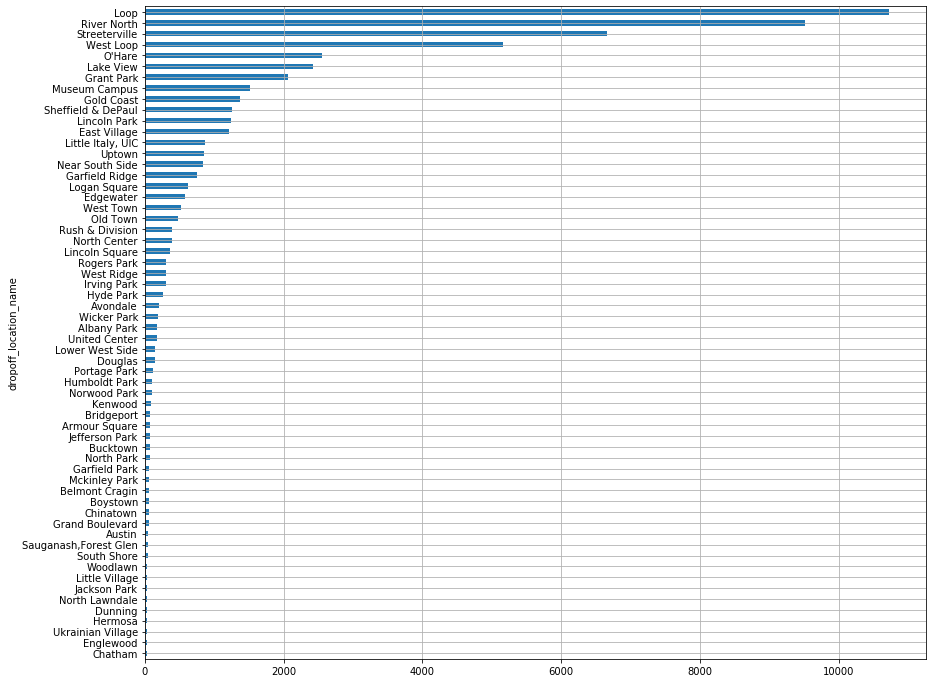

In [21]:
# Plotting only the first 60 datapoints because the rest is not visable anyways.
rides_by_dist[0:60].sort_values('average_trips') \
                   .plot(x='dropoff_location_name',
                         y='average_trips', 
                         kind='barh',
                         figsize=(14,12), 
                         grid=True,
                         legend=False);
percent_top_4 = rides_by_dist['average_trips'][0:4].sum() / \
                rides_by_dist['average_trips'].sum()
percent_top_10 = rides_by_dist['average_trips'][0:10].sum() / \
                rides_by_dist['average_trips'].sum()
print('share of top 4 districts on total average trips:{:.2%}'.format(percent_top_4))
print('share of top 10 districts on total average trips:{:.2%}'.format(percent_top_10))

> **Observations:**
> - The bar chart shows tat there are only 6 out of 95 districts where are more than 2000 rides per day
> - the top 4 districts are destination for around 57% of the rides. 
> - the top 10 districts are destinations for over 76% of the rides.

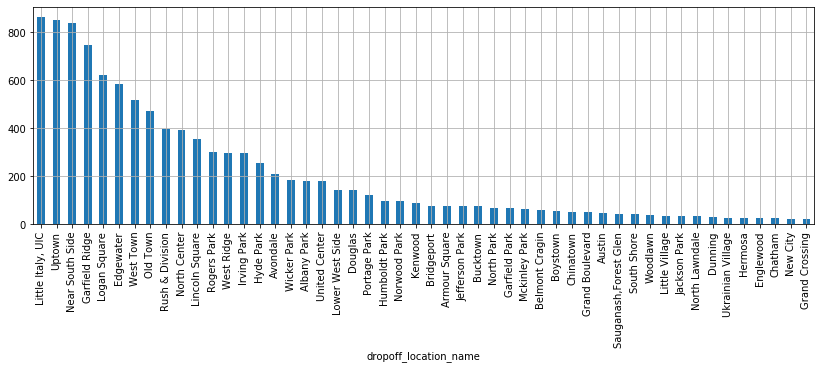

In [22]:
# Plotting the first 50 companies because the smaller ones are not visable any more
rides_by_dist.query('average_trips < 1000')[0:50].plot(kind='bar',
                                                       figsize=(14,4),
                                                       grid=True,
                                                       x='dropoff_location_name',
                                                       y='average_trips', 
                                                       legend=False
                                                      );

> **Observations:**  
> Even after only checking the dataframe without outliers, the average trips per district are decreasing fast, so that only the top 27 districts have more than 200 trips per day on average.

> - \-\> Thus, in the following steps the top 10 districts will be investigated

### 3.2.2. Slicing dataframe and plotting top ten districts

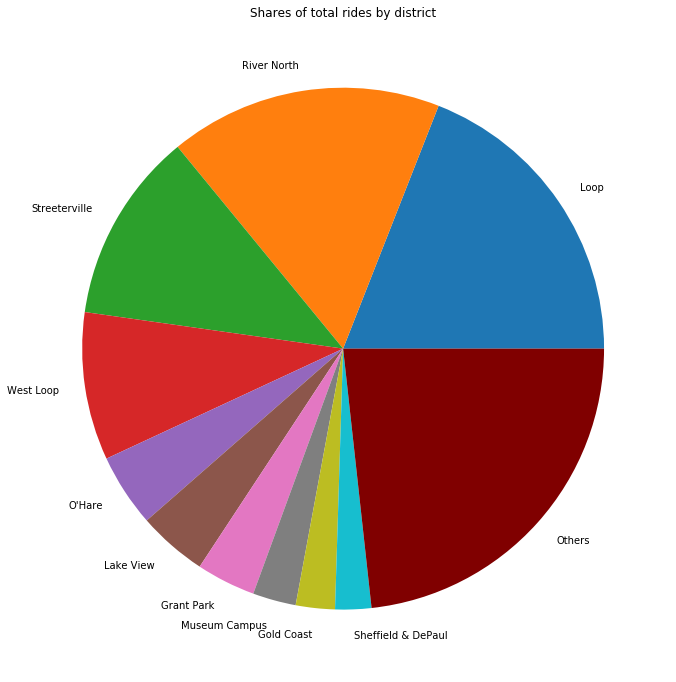

In [23]:
# Slicing df in top ten and rest
rides_by_dist_tt = rides_by_dist[0:10].copy()
rides_by_dist_rest = rides_by_dist[10:]

# Calculating sum of 10-rest
row_others = pd.DataFrame(data = {
    'dropoff_location_name': 'Others',
    'average_trips': [rides_by_dist['average_trips'][10:].sum()]
})
rides_by_dist_agg = pd.concat([rides_by_dist_tt, row_others])

# Selecting colors for pie chart
colors=list(mcolors.TABLEAU_COLORS.values())

# Plotting pie chart
colors.append('maroon')
ax = rides_by_dist_agg.plot(kind='pie',
                           y='average_trips',
                           labels=rides_by_dist_agg['dropoff_location_name'],
                           figsize=(12, 12),
                           colors=colors,
                           legend=False,
                           title='Shares of total rides by district');
ax.set_ylabel('')
plt.show()

Text(0.5, 0, 'Total rides')

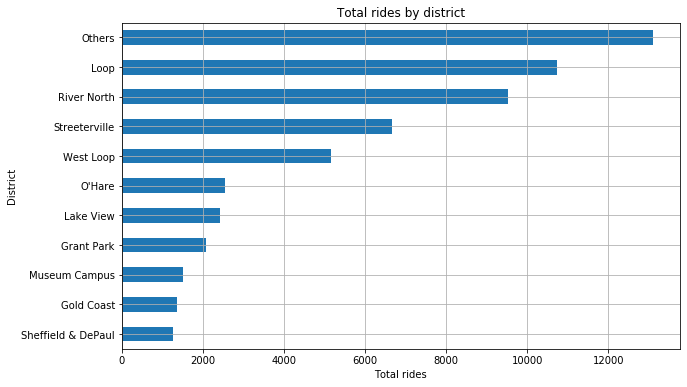

In [24]:
# Printing same plot as barchart
ax = rides_by_dist_agg.sort_values('average_trips') \
                      .plot(kind='barh',
                            x='dropoff_location_name',
                            y='average_trips',
                            figsize=(10, 6),
                            grid=True,
                            legend=False
                           );
ax.set_title('Total rides by district')
ax.set_ylabel('District')
ax.set_xlabel('Total rides')

> **Observations:**
> - The percentages and average ride shares of the previous are approved and viualized good.
> - Now the pattern for the big shares will be investigated

### 3.2.3. Investigating causes for distributions
> In order to investigate, the top and bottom 10 districts are marked on the map

In [25]:
# Investigating the map
print('Top 5 destinations')
display(rides_by_dist['dropoff_location_name'][0:10])
print('\nBottom 5 destinations')
display(rides_by_dist['dropoff_location_name'][-10:])

Top 5 destinations


0                  Loop
1           River North
2         Streeterville
3             West Loop
4                O'Hare
5             Lake View
6            Grant Park
7         Museum Campus
8            Gold Coast
9    Sheffield & DePaul
Name: dropoff_location_name, dtype: object


Bottom 5 destinations


84       West Pullman
85          Montclare
86        West Elsdon
87            Pullman
88              Undef
89    Mount Greenwood
90          Hegewisch
91           Burnside
92          East Side
93          Riverdale
Name: dropoff_location_name, dtype: object

<a href="https://ibb.co/80LZ3MZ"><img src="https://i.ibb.co/DtH2X42/Maps.png" alt="Maps" border="0"></a>

> **Observations:**
> - The top 10 districts are in the center with the exception of O'Hare. This exception occurs because the international Airport is located in O'hare.
> - The bottom 10 districts are loacated in the outer city.
> - This distribution makes sense because the destinations of the rides from out to inner chicago are focusing on the downtown districts whereas the rides from the downtown districts are separating in multiple outer districts.

## 3.3. Loop airport
> - In the picture aboth you can see both loop and the airport marked with a green identifyer. Loop itself is in the city center and the airport is the green identifyer outside the city center. 
> - Due to the fact that the trips from downtown to the airport are investigated, a big variance of trip times will be expected, even on saturdays.
> - Therefore in this EDA, the following points will be investigated:
> > - Missing data (duration = 0)
> > - Invalid data and outliers
> > - Trip duration over hours

### 3.3.1. Missing data
> In this step missing data has been investigated.  
> Missing data contains rides which durations is equal to 0 seconds

In [26]:
# Checking percentage of missing values
print((loop_airport.duration_seconds==0).sum() / loop_airport.shape[0])

# Dropping missing values
mask = loop_airport['duration_seconds']==0
to_drop = loop_airport.index[mask].tolist()
loop_airport.drop(to_drop, inplace=True)
loop_airport.reset_index(inplace=True, drop=True)

0.0056179775280898875


> Missing values are < 1% and can be dropped for that reason

### 3.3.2. Invalid data and outliers
> In this step invalid data and outliers have been investigated and dropped if possible.  
> Therefore the minimum driving time has been investigated based on the distance beteween the two points and the driving speed. The start point for minimal driving time has been choosen direct on the district border next to the highway


<a href="https://ibb.co/SXdVv0x"><img src="https://i.ibb.co/3yMShWs/loop-airport.png" alt="loop-airport" border="0"></a>

In [27]:
# With 18.3 miles and 70mph as maximum velocity the fastest trip is calculated:
min_duration_min = 18.3 / 70 * 60
min_duration_sec = int(min_duration_min * 60)
min_duration_sec

941

> All trips which are shorter thatn 941 seconds need to be investigated

In [28]:
# Outputting the rides shorter than 941 secs
display(loop_airport[loop_airport.duration_seconds< 941])

# Calculating neccessary average speed for 8 minutes ride
print(60 * 18.3 / 8)

# Dropping too fast rides
mask = loop_airport['duration_seconds'] < 941
to_drop = loop_airport.index[mask].tolist()
loop_airport.drop(to_drop, inplace=True)
loop_airport.reset_index(inplace=True, drop=True)

,start_ts,weather_conditions,duration_seconds,duration_min,hour
15,2017-11-25 13:00:00,1,60,1.0,13
201,2017-11-18 00:00:00,0,480,8.0,0
421,2017-11-11 13:00:00,1,420,7.0,13
855,2017-11-04 18:00:00,0,480,8.0,18


137.25


> All of those 4 trips are in the range of 1-8 Minutes which is considered impossible because an average speed of 137 mph would be required. Thus the values have been dropped

upper whisker: 4290.0
lower whisker: -270.0
count of outliers: 6
average speed max: 15.356643356643357


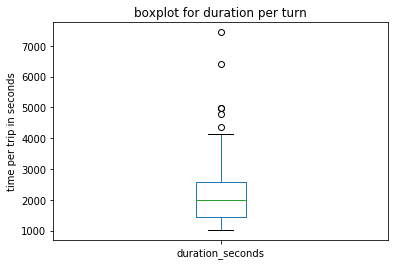

In [29]:
# Print boxplot and calculating upper and lower whisker
ax = loop_airport['duration_seconds'].plot(kind='box');
ax.set_title('boxplot for duration per turn')
ax.set_ylabel('time per trip in seconds')
iqr = loop_airport['duration_seconds'].quantile(.75) \
    - loop_airport['duration_seconds'].quantile(.25)
low = loop_airport['duration_seconds'].quantile(.25) - iqr*1.5
up = loop_airport['duration_seconds'].quantile(.75) + iqr*1.5
print(f'upper whisker: {up}\nlower whisker: {low}')

# Calculating count outliers:
out = loop_airport.query('duration_seconds > 4290').shape[0]
print(f'count of outliers: {out}')

# Calculating average speed for 4290 secs
print(f'average speed max: {60 * 60 * 18.3 / 4290}')

# Droppig outliers
mask = loop_airport['duration_seconds'] > 4290
to_drop = loop_airport.index[mask].tolist()
loop_airport.drop(to_drop, inplace=True)
loop_airport.reset_index(inplace=True, drop=True)

> Trips over 4290 seconds would require average speeds of 15 mph, which is even with traffic jams too slow.
> Thus those values have been dropped because it seems that those entries are faulty

### 3.3.3. General vizualisation
> In this step first of all the data itself has been inspected including rides per hour, relations between time and duration and time and amount of rides

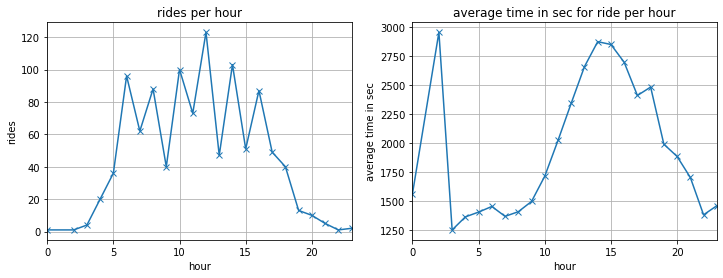

In [30]:
# Aggregating df
cols = ['hour', 'duration_seconds']
loop_agg = loop_airport[cols].groupby('hour') \
                             .agg(trips_per_hour = ('hour', 'count'),
                                  avg_duration = ('duration_seconds', 'mean'))

# plotting df
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
loop_agg['trips_per_hour'].plot(grid=True, style='x-', ax=ax[0]);
loop_agg['avg_duration'].plot(grid=True, style='x-', ax=ax[1]);
ax[0].set_title('rides per hour')
ax[1].set_title('average time in sec for ride per hour')
ax[0].set_ylabel('rides')
ax[1].set_ylabel('average time in sec')
plt.show()

> **Observations:**
> - The distribution shows that the mine time for rides is from 5 in the morning until 6 in the evening. During the night hours the rides are constantly below 20 rides per hour
> - The average time during the night (23-11 'o clock) is significant lower than the average duration during the day
> - The peak foraverage time per ride at 2 o clock needs to be investigated, doesnt fit into the graph

linear estimated value for 2 oclock: 1353.0


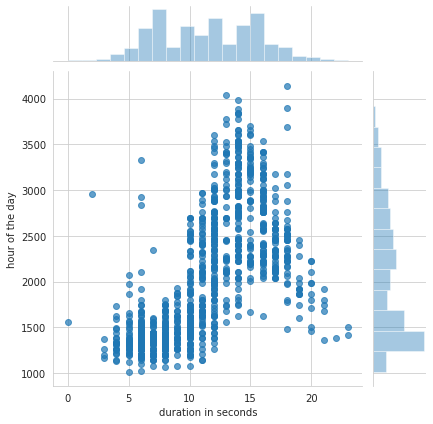

In [31]:
# Joint Distribution Plot
with sns.axes_style("whitegrid"):
    g = sns.jointplot(
                      x='hour',
                      y='duration_seconds',
                      data=loop_airport[['hour', 'duration_seconds']], 
                      alpha=0.7
                     );
    
    g.set_axis_labels('duration in seconds', 'hour of the day')

# Investigating linear regression value
value_to_assign = loop_agg.loc[0, 'avg_duration'] - \
                  (loop_agg.loc[0, 'avg_duration'] - \
                   loop_agg.loc[3, 'avg_duration']) / 3 * 2
print(f'linear estimated value for 2 oclock: {value_to_assign}')

> **Observations:**
> - There are still outliers in the dataset for specific times like 6 or 18 o clock.
> - The previous detected peak at 2 in the morning refers to the fact that there is only one datapoint available which seems to be an outlier. Because the dataset is so small and the correlation between duration and time is obvious this one datapoint will be changed to fit into the trend from 0-3 o clock by setting it to 1353. For big datasets a predictive model / regression needs to be built to make automatized assumptions.

In [32]:
# remove outlier
mask = loop_airport['hour']==2
loop_airport.loc[mask, 'duration_seconds'] = value_to_assign
loop_airport.loc[mask, 'duration_min'] = value_to_assign / 60

# Update df
cols = ['hour', 'duration_seconds']
loop_agg = loop_airport[cols].groupby('hour') \
                             .agg(trips_per_hour = ('hour', 'count'),
                                  avg_duration = ('duration_seconds', 'mean'))

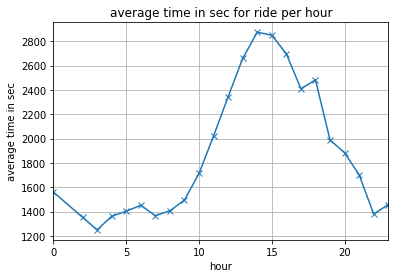

In [33]:
# Check if result is as expected
ax = loop_agg['avg_duration'].plot(grid=True, style='x-');
ax.set_title('average time in sec for ride per hour')
ax.set_ylabel('average time in sec')
plt.show()

> **Conlusion**: Now the graph looks like we would it expect it to be

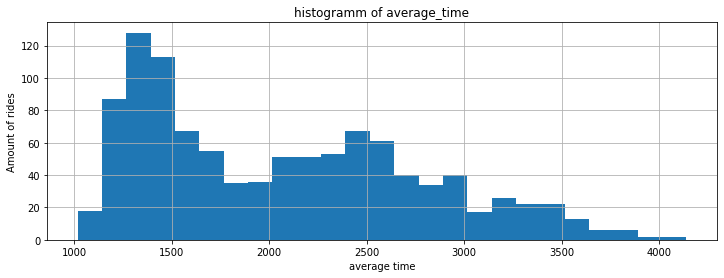

In [34]:
# Changing value of 3 in the night
# Plotting histogramm
ax = loop_airport['duration_seconds'].plot(kind='hist',
                                           grid = True,
                                           bins=25,
                                           figsize=(12,4));
ax.set_title('histogramm of average_time')
ax.set_xlabel('average time')
ax.set_ylabel('Amount of rides')
plt.show()

> **Observaion:**
> In general there are two main peaks for duration, one for the night and one for the day

### 3.3.4. Vizalisation after weather
> In order to enable identifying rainy/sunny days, the date collumn needs to be extracted from the datetime

In [35]:
# Extracting and adding date collum
loop_airport['date'] = loop_airport['start_ts'].dt.day

In [36]:
# Checking how many datapoints we got for good and bad days
cols = ['hour', 'duration_seconds', 'weather_conditions']
loops_weather = loop_airport[cols].groupby('weather_conditions') \
                                    .agg(total_trips=('duration_seconds', 'count'),
                                        avg_duration=('duration_seconds', 'mean'))
loops_weather

,total_trips,avg_duration
weather_conditions,,
0,177,2434.785311
1,875,1994.981714


> **Observation:**
> - there are 5 times more datapoints for good than for bad weather which makes the distribution for good weather more representative than the distribution for bad weather 

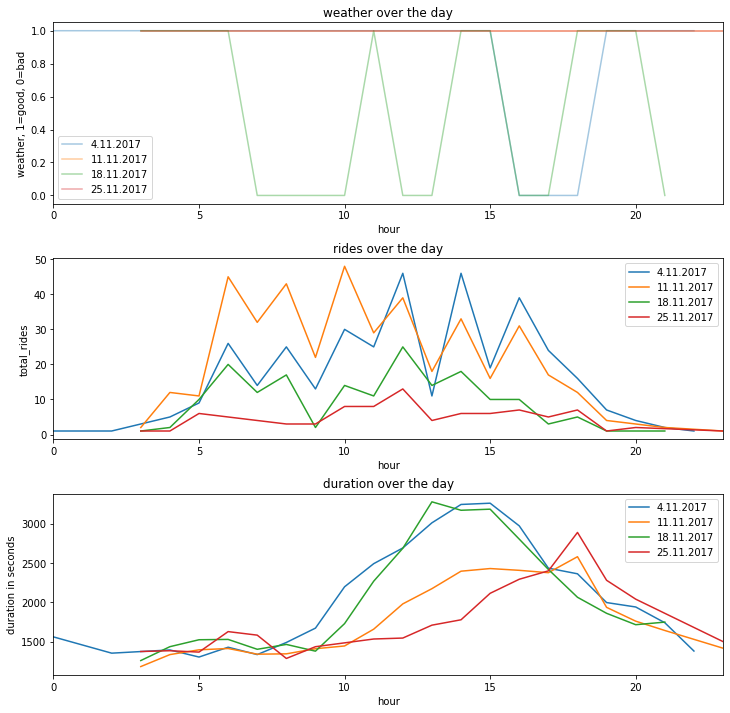

In [37]:
# Aggregating df
cols = ['date', 'hour', 'duration_seconds', 'weather_conditions']
agg_by_day = loop_airport[cols].groupby('date') \
                               .agg(trips_per_day = ('date', 'count'),
                                    avg_duration = ('duration_seconds', 'mean'),
                                    weather = ('weather_conditions', 'mean'))

# Init subplots and plotting data per day
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)
for date, group in  loop_airport[cols].groupby('date'):
    date_agg = group.groupby('hour').agg(weather = ('weather_conditions', 'mean'),
                                     rides = ('duration_seconds', 'count'),
                                     average = ('duration_seconds', 'mean')
                                    )
    date_agg['weather'].plot(ax=ax[0], alpha=0.4, label=str(date)+'.11.2017', legend=True)
    date_agg['rides'].plot(ax=ax[1], label=str(date)+'.11.2017', legend=True)
    date_agg['average'].plot(ax=ax[2], label=str(date)+'.11.2017', legend=True)
    ax[0].set_title('weather over the day')
    ax[0].set_ylabel('weather, 1=good, 0=bad')
    ax[1].set_title('rides over the day')
    ax[1].set_ylabel('total_rides')
    ax[2].set_title('duration over the day')
    ax[2].set_ylabel('duration in seconds')

> **Observation:**
> - There seems to be a correlation of complete good days in the duration for the trips (red and orange) and partially bad days (green and blue), whereas the rides per day seems not to be influenced by the weather which need to be validated with further day
> - \-\> This makes sense because the trips to the airport are related to the flights, which explains that the amount is not related to the weather because flights normally are booked in advance. The only difference the weather has can be measured by the duration. Because if the weather is bad there might be more traffic on the streets to different times.

# 4. SDA with loop Airport data

## 4.1. By hourly weather

In this step the data has split into good/bad weather by hour

> **Test parameter for both tests**  
> alpha = 0.05 (5%)  

> **Test hypothesis levene Test**  
> H0: Variance of rides during good weather on saturdays = variance of rides during bad weather on saturdays  
> H1: Variance of rides during good weather on saturdays <> variance of rides during bad weather on saturdays  

> **Test hypothesis revenue tesing**  
> H0: average duration of rides at good hours = average duration of rides at good hours  
> H1: average duration of rides at good hours <> average duration of rides at good hours  

count     177.000000
mean     2434.785311
std       670.068237
min      1182.000000
25%      1980.000000
50%      2560.000000
75%      2926.000000
max      4044.000000
Name: duration_seconds, dtype: float64

count     875.000000
mean     1994.981714
std       684.044017
min      1018.000000
25%      1395.000000
50%      1800.000000
75%      2460.000000
max      4140.000000
Name: duration_seconds, dtype: float64

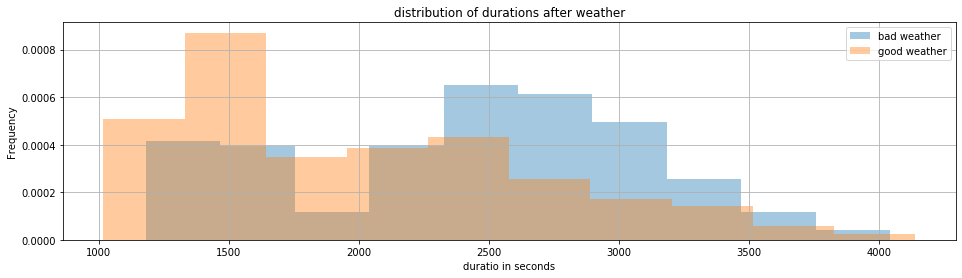

In [38]:
# Slicing dataframes in good and bad weather
good_weather = loop_airport.query('weather_conditions == 1')
bad_weather = loop_airport.query('weather_conditions == 0')

legend={0:'bad weather', 1:'good weather'}
for idx, df in enumerate((bad_weather, good_weather)):
    display(df['duration_seconds'].describe())
    ax = df['duration_seconds'].plot(kind='hist',
                                       density=True,
                                       alpha=0.4,
                                       grid=True,
                                       figsize=(16,4),
                                       label=legend[idx],
                                       legend=True
                                       )
    ax.set_title('distribution of durations after weather')
    ax.set_xlabel('duratio in seconds')
# Aggregating dataframes

> **Observation:**
> - The distributions differs
<!-- > - There are different peaks if the weather is different -->

In [39]:
# Checking variances of both dataframse
st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

LeveneResult(statistic=0.44653935613204454, pvalue=0.5041298191710877)

> **Observation:**  
> pval > alpha -> Failed to reject H0  
> -> equalvar = True

In [40]:
# Carry out significance test
st.ttest_ind(good_weather['duration_seconds'],
             bad_weather['duration_seconds'],
             equal_var=True
            )

Ttest_indResult(statistic=-7.827708427731924, pvalue=1.2083362446938216e-14)

> **Observation:**  
> pval < alpha -> Reject H0  
> -> The average durations for a ride airport-loop must be considered as different.

## 4.2. By daily weather
In this step the data has split into good/bad weather by day

> **Test parameter for both tests**  
> alpha = 0.05 (5%)  

> **Test hypothesis levene Test**  
> H0: Variance of rides during good weather days on saturdays = variance of rides during bad weather days on saturdays  
> H1: Variance of rides during good weather days on saturdays <> variance of rides during bad weather days on saturdays

> **Test hypothesis revenue tesing**  
> H0: average duration of rides at good weather days = average duration of rides at good weather days  
> H1: average duration of rides at good weather days <> average duration of rides at good weather days

count     511.000000
mean     1777.947162
std       512.737894
min      1063.000000
25%      1380.000000
50%      1596.000000
75%      2195.500000
max      4140.000000
Name: duration_seconds, dtype: float64

count     541.000000
mean     2343.872458
std       743.135966
min      1018.000000
25%      1610.000000
50%      2458.000000
75%      2940.000000
max      4044.000000
Name: duration_seconds, dtype: float64

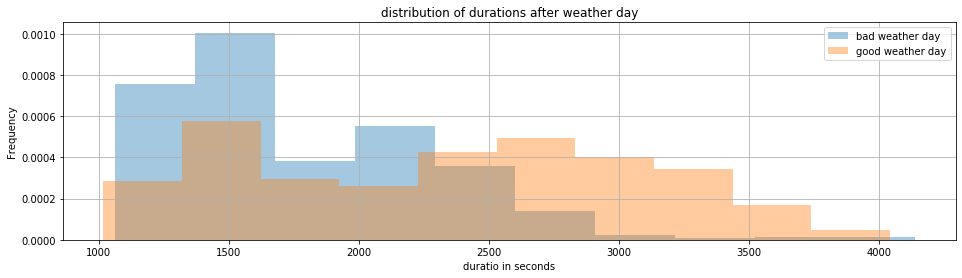

In [41]:
# Aggregating df
cols = ['date', 'hour', 'duration_seconds', 'weather_conditions']
agg_by_day = loop_airport[cols].groupby('date') \
                               .agg(weather = ('weather_conditions', 'mean'))
# Creating dict
daily_weather = agg_by_day.apply(np.floor) \
                          .reset_index() \
                          .set_index('date')['weather'] \
                          .to_dict()

# Applying dict to loop_airport
loop_airport['weather_day'] = loop_airport['date'].map(daily_weather)

# slicing good_day, bad_day
good_day = loop_airport.query('weather_day == 1')
bad_day = loop_airport.query('weather_day == 0')

# Plotting distributions
legend={0:'bad weather day', 1:'good weather day'}
for idx, df in enumerate((good_day, bad_day)):
    display(df['duration_seconds'].describe())
    ax = df['duration_seconds'].plot(kind='hist',
                                       density=True,
                                       alpha=0.4,
                                       grid=True,
                                       figsize=(16,4),
                                       label=legend[idx],
                                       legend=True
                                       )
    ax.set_title('distribution of durations after weather day')
    ax.set_xlabel('duratio in seconds')

> **Observation:**
> - The distributions differs
> - There are different peaks if the weather is different

In [42]:
# Checking variances of both dataframse
st.levene(good_day['duration_seconds'], 
          bad_day['duration_seconds'])

LeveneResult(statistic=92.07424670124742, pvalue=5.8652640683341304e-21)

> **Observation:**  
> pval < alpha -> Reject H0  
> -> equalvar = False

In [43]:
# Carry out significance test
st.ttest_ind(good_day['duration_seconds'],
             bad_day['duration_seconds'],
             equal_var=False
            )

Ttest_indResult(statistic=-14.443269807941878, pvalue=6.048666534486107e-43)

> **Observation:**  
> pval < alpha -> Reject H0  
> -> The average durations for a ride airport-loop must be considered as different with bad and good weather.

# 5. Overall conclusion
In this project a in depth analysis has been carried out for a fictive new ride-share company named Zuber which is launching in Chicago.  
To find patterns and preferences in the passengers behaviour and the impact of external factors the company provided data in a database containing info on taxi rides in Chicago.

In order to select and use the necessary data a SQL query has been developed and executed.  
Additional to the provided data, the weather data of given time period has been scraped.  
To enable an in-depth understanding of the cab rides and the high variance in rides per company the public available datasets for medallion owners in Chicago has been downloaded via the API on the website of the city.

The following steps have been performed within the project:

- Data mining, aggregation and merging
- Data preprocessing 
- Extensive Exploratory Data Analysis

Observations within the project:
- There are two different types of cab drivers: affiliations and independent drivers. The percentage of surrendered independent cab drivers since 2017 is pretty high. Therefore the Zuber needs to pay attention to bind their drivers pretty well
- The amount of rides to the city centre is significant higher than to the outer districts
- The weather does not influence the routes from the city center to the airport drastically, but for the rest of the destinations, the weather has an impact. (bad weather leads to an increase in rides) 
- The duration of the trips from the airport to the city centre differs. This can be explained by the general increased use of cars due to bad weather and consequentially fuller streets.
